<a href="https://colab.research.google.com/github/LakshmisriDhanapal/Deep-Learning/blob/main/deep_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 869 entries, 0 to 868
Data columns (total 76 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   COMMODITIES  869 non-null    object 
 1   Weight       868 non-null    float64
 2   Apr-11       868 non-null    float64
 3   May-11       865 non-null    float64
 4   Jun-11       866 non-null    float64
 5   Jul-11       865 non-null    float64
 6   Aug-11       864 non-null    float64
 7   Sep-11       864 non-null    float64
 8   Oct-11       865 non-null    float64
 9   Nov-11       867 non-null    float64
 10  Dec-11       867 non-null    float64
 11  Jan-12       867 non-null    float64
 12  Feb-12       867 non-null    float64
 13  Mar-12       867 non-null    float64
 14  Apr-12       868 non-null    float64
 15  May-12       865 non-null    float64
 16  Jun-12       866 non-null    float64
 17  Jul-12       865 non-null    float64
 18  Aug-12       864 non-null    float64
 19  Sep-12  

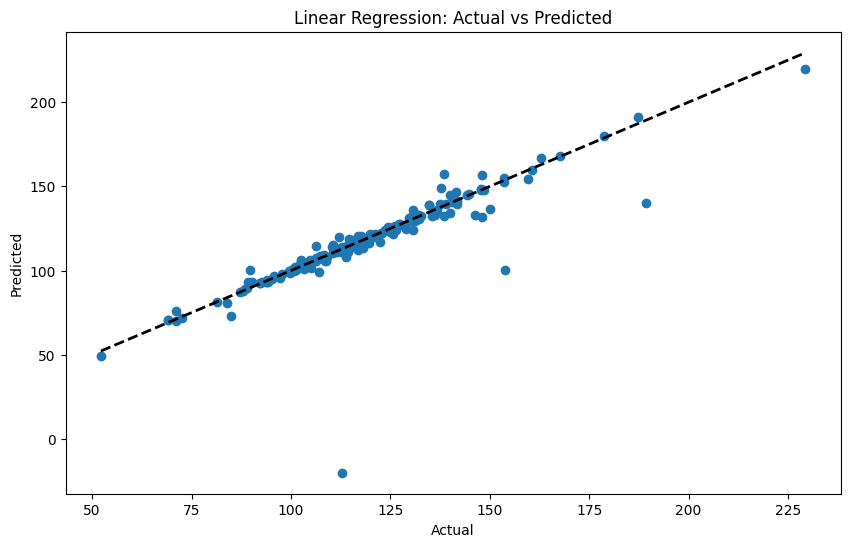

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler

# Load the dataset with proper encoding
data = pd.read_csv("/content/WPI-2011-12-May2017.csv", encoding='ISO-8859-1')

# Display basic information about the dataset
print(data.info())
print(data.describe())

# Drop rows with missing values in the May 2017 column (target column)
data_cleaned = data.dropna(subset=['May-17'])

# Extract features and target variable
X = data_cleaned.drop(['COMMODITIES', 'May-17'], axis=1)
y = data_cleaned['May-17']

# Handling missing values by filling them with the mean of each column
X = X.fillna(X.mean())

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Linear Regression Model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Predict on the test data
y_pred = model.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Adjusted R-squared calculation
n = len(y_test)  # Number of data points
p = X_train.shape[1]  # Number of features
adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R^2 Score: {r2}")
print(f"Adjusted R^2 Score: {adjusted_r2}")

# Plotting the results
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Linear Regression: Actual vs Predicted')
plt.show()
